In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Train_data_1.csv")

In [3]:
df.head()

,Unnamed: 0,ChargeOffMOB,BalanceAtDefault,JointIndicator,LCPIndicator,StateApplicant,NewUsedIndicator,VehicleManufacturerRebate,VehicleAge,VehicleMileage,...,NumExceptionPctAvgNumExceptionLast30DaysBookedLoans,NumPriorCrescentApplications,NumPriorCrescentApplicationsLast180Days,JDPUVIDiffCOFromOrig,MoodysUVIDiffCOFromOrig,FICOScore,FICOScorePctAvgFICOLast30DaysBookedLoans,CreditBureauPctTradesDelq,VehicleName,Recovery_Rate
0,0,15.0,9914.12,0.0,1.0,0.007757,0.0,0.0,5.0,22922.0,...,1.1903,0.0,0.0,5.937,2.39,535.000000,1.020300,1.0000,-0.030886,0.1856
1,1,27.0,8484.37,0.0,0.0,-0.014060,0.0,0.0,2.0,55703.0,...,0.0000,0.0,0.0,-10.699,-7.92,534.000000,0.980800,0.9000,-0.047215,0.0000
2,2,8.0,14905.78,0.0,0.0,0.029890,1.0,2000.0,0.0,777.0,...,0.0000,1.0,1.0,0.729,0.56,495.000000,0.943500,0.9286,-0.047321,0.5889
3,3,15.0,13260.44,0.0,0.0,0.002872,0.0,0.0,3.0,34566.0,...,0.0000,0.0,0.0,4.355,3.08,537.147939,1.015511,1.0000,-0.012944,0.3246
4,4,10.0,20073.82,1.0,0.0,-0.035374,1.0,0.0,0.0,18.0,...,0.0000,3.0,1.0,-4.274,-4.50,499.180523,0.946399,0.9286,0.055713,0.9667


In [4]:
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Recovery_Rate'], axis= 1), df['Recovery_Rate'], test_size=1000)

In [6]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Recovery_Rate   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     59.43
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:18:03   Log-Likelihood:                 2220.6
No. Observations:               12664   AIC:                            -4313.
Df Residuals:                   12600   BIC:                            -3837.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [7]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
poly = PolynomialFeatures(
    degree = 2, include_bias = False, interaction_only = False)


In [8]:
X_train_poly = poly.fit_transform(X_train)
polynomial_column_names = poly.get_feature_names(input_features = X_train.columns)
X_train_poly = pd.DataFrame(data = X_train_poly, 
        columns = polynomial_column_names )
X_train_poly.columns = X_train_poly.columns.str.replace(' ', '_')
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [9]:
sc = StandardScaler()
X_train_poly_scaled = sc.fit_transform(X_train_poly)
X_train_poly_scaled = pd.DataFrame( data = X_train_poly_scaled, columns = X_train_poly.columns)

In [10]:
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = sc.transform(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
def regmodel_param_plot(
    validation_score, train_score, alphas_to_try, chosen_alpha,
    scoring, model_name, test_score = None, filename = None):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()

In [12]:
def regmodel_param_test(
    alphas_to_try, X, y, cv, scoring = 'r2', 
    model_name = 'LASSO', X_test = None, y_test = None, 
    draw_plot = False, filename = None):
    
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        
        if model_name == 'LASSO':
            regmodel = Lasso(alpha = curr_alpha)
        elif model_name == 'Ridge':
            regmodel = Ridge(alpha = curr_alpha)
        else:
            return None

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, model_name, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha

In [13]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, LinearRegression
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split
clf = Lasso(alpha=1e-10, max_iter=100000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+02, tolerance: 6.773e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.24467186621475545

In [14]:
from sklearn.metrics import r2_score, get_scorer

In [15]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lasso_alphas = np.linspace(0, 0.02, 11)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+02, tolerance: 5.406e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

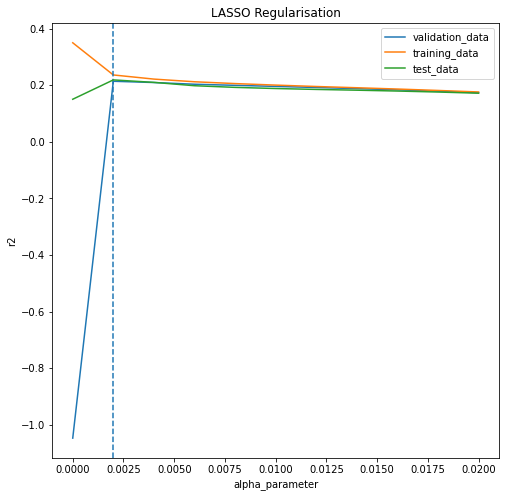

Chosen alpha: 0.00200
Validation score: 0.21361
Test score at chosen alpha: 0.21843


In [ ]:
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        lasso_alphas, X_train_poly_scaled, y_train, 
        cv, scoring = 'r2', model_name = 'LASSO', 
        X_test = X_test_poly_scaled, y_test = y_test, 
        draw_plot = True, filename = 'lasso_wide_search')
print("Chosen alpha: %.5f" % \
    chosen_alpha)
print("Validation score: %.5f" % \
    max_validation_score)
print("Test score at chosen alpha: %.5f" % \
    test_score_at_chosen_alpha)

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import mean_squared_log_error

In [ ]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
159/159 [==============================] - 4s 21ms/step - loss: 0.1395 - mean_squared_logarithmic_error: 0.1390 - val_loss: 0.0277 - val_mean_squared_logarithmic_error: 0.0277
Epoch 2/10
159/159 [==============================] - 3s 19ms/step - loss: 0.0289 - mean_squared_logarithmic_error: 0.0289 - val_loss: 0.0276 - val_mean_squared_logarithmic_error: 0.0276
Epoch 3/10
159/159 [==============================] - 3s 19ms/step - loss: 0.0290 - mean_squared_logarithmic_error: 0.0291 - val_loss: 0.0276 - val_mean_squared_logarithmic_error: 0.0276
Epoch 4/10
159/159 [==============================] - 3s 20ms/step - loss: 0.0289 - mean_squared_logarithmic_error: 0.0289 - val_loss: 0.0280 - val_mean_squared_logarithmic_error: 0.0280
Epoch 5/10
159/159 [==============================] - 3s 20ms/step - loss: 0.0289 - mean_squared_logarithmic_error: 0.0289 - val_loss: 0.0276 - val_mean_squared_logarithmic_error: 0.0276
Epoch 6/10
159/159 [==============================] - 3s 20ms/ste

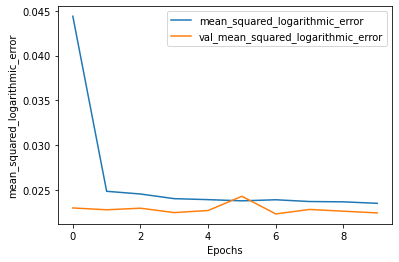

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
predictions= model.predict(x_test_scaled, verbose= True)

32/32 [==============================] - 0s 10ms/step


In [ ]:
def RMSLE(y_true: np.array, y_pred: np.array) -> np.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric 
        
    :param y_true: The ground truth labels given in the dataset
    :param y_pred: Our predictions
    :return: The RMSLE score
    """
    return mean_squared_log_error(y_true, y_pred, squared=False)

In [ ]:
mean = np.mean(df['Recovery_Rate'])

print(f"RMSLE for predicting only 0: {round(RMSLE(df['Recovery_Rate'], np.zeros(len(df))), 5)}")
print(f"RMSLE for predicting only 1: {round(RMSLE(df['Recovery_Rate'], np.ones(len(df))), 5)}")
print(f"RMSLE for predicting only 50: {round(RMSLE(df['Recovery_Rate'], np.full(len(df), 50)), 5)}")
print(f"RMSLE for predicting the mean ({round(mean, 2)}): {round(RMSLE(df['Recovery_Rate'], np.full(len(df), mean)), 5)}")

RMSLE for predicting only 0: 0.39126
RMSLE for predicting only 1: 0.37995
RMSLE for predicting only 50: 3.58295
RMSLE for predicting the mean (0.44): 0.16958


In [ ]:
best_const = np.expm1(np.mean(np.log1p(df['Recovery_Rate'])))

In [ ]:
print(f"The best constant for our data is: {best_const}...")
print(f"RMSLE for predicting the best possible constant on our data: {round(RMSLE(df['Recovery_Rate'], np.full(len(df), best_const)), 5)}\n")

print("This is the optimal RMSLE score that we can get with only a constant prediction and using all data available.\n\
We therefore call it the best 'Naive baseline'\n\
A model should at least perform better than this RMSLE score.")

The best constant for our data is: 0.42313938912205373...
RMSLE for predicting the best possible constant on our data: 0.16902

This is the optimal RMSLE score that we can get with only a constant prediction and using all data available.
We therefore call it the best 'Naive baseline'
A model should at least perform better than this RMSLE score.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN= KNeighborsRegressor(n_neighbors= 10, leaf_size= 0)

KNN.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=0, n_neighbors=10)

In [ ]:
predictions = KNN.predict(X_test)

In [ ]:
RMSLE(y_test, predictions)

0.1674680631009561

In [ ]:
too_damn_far = list()
for i in range(len(y_test)):
  if abs(y_test.to_list()[i] - predictions[i]) > 0.15:
    too_damn_far.append(i)

print(len(too_damn_far)/1000)


0.519


In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate': 2, 'max_bin': 2000, 'num_iterations': 10000, 'num_leaves': 5000}
model= lgb.train(params, train_data, 20000)
y_pred=model.predict(X_test)
for i in range(0,len(y_pred)):
   if y_pred[i]>=0.5: 
    y_pred[i]=1
   else: 
    y_pred[i]=0
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
rmse

0.4982947072967964

In [19]:
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor

#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number
#of instances per leaf = 5
regression_model = DecisionTreeRegressor(criterion="rmse",min_samples_leaf=1) 


#Fit the model
regression_model.fit(X_train,y_train)


#Predict unseen query instances
predicted = regression_model.predict(X_test)

RMSE = np.sqrt(np.sum(((y_test-predicted)**2)/len(y_test)))
RMSE

KeyError: ignored